In [2]:
# pip install imutils

  Using cached imutils-0.5.4-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

In [7]:
img_orig = cv2.imread('./images/N116.jpg')

In [8]:
cv2.namedWindow('original',cv2.WINDOW_NORMAL)
cv2.imshow('original',img_orig)
cv2.waitKey()
cv2.destroyAllWindows()

### Scanning

#### 1. Resize the image and set aspect ratio

In [9]:
def resizer(image,width=500):
    # get widht and height
    h,w,c = image.shape
    
    height = int((h/w)* width )
    size = (width,height)
    image = cv2.resize(image,(width,height))
    return image, size

In [10]:
img_re,size = resizer(img_orig)
print(size)
cv2.imshow('Resize',img_re)
cv2.waitKey()
cv2.destroyAllWindows()

(500, 707)


#### 2. Image Processing
1. Enhance
2. Grayscale
3. Blur
4. Edge Detect
5. Morphological transform
6. Countors
7. Find Four Points


In [11]:
detail = cv2.detailEnhance(img_re,sigma_s = 20, sigma_r = 0.15)
gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
blur = cv2.GaussianBlur(gray,(5,5),0)
# edge detect
edge_image = cv2.Canny(blur,75,200)
# morphological transform
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(edge_image,kernel,iterations=1)
closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)

# find the contours
contours , hire = cv2.findContours(closing,
                                   cv2.RETR_LIST,
                                   cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)
for contour in contours:
    peri = cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour,0.02*peri, True)
    
    if len(approx) == 4:
        four_points = np.squeeze(approx)
        break
        
cv2.drawContours(img_re,[four_points],-1,(0,255,0),3)

# find four points for original image
multiplier = img_orig.shape[1] / size[0]
four_points_orig = four_points * multiplier
four_points_orig = four_points_orig.astype(int)

In [12]:
from imutils.perspective import four_point_transform

In [13]:
wrap_image = four_point_transform(img_orig,four_points_orig)

In [59]:
# cv2.imshow('wrap',wrap_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### document scanner function

In [14]:
def document_scanner(image):

    img_re,size = resizer(image)
    detail = cv2.detailEnhance(img_re,sigma_s = 20, sigma_r = 0.15)
    gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
    blur = cv2.GaussianBlur(gray,(5,5),0)
    # edge detect
    edge_image = cv2.Canny(blur,75,200)
    # morphological transform
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(edge_image,kernel,iterations=1)
    closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)

    # find the contours
    contours , hire = cv2.findContours(closing,
                                       cv2.RETR_LIST,
                                       cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for contour in contours:
        peri = cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,0.02*peri, True)

        if len(approx) == 4:
            four_points = np.squeeze(approx)
            break

    cv2.drawContours(img_re,[four_points],-1,(0,255,0),3)

    # find four points for original image
    multiplier = image.shape[1] / size[0]
    four_points_orig = four_points * multiplier
    four_points_orig = four_points_orig.astype(int)

    wrap_image = four_point_transform(image,four_points_orig)
    
    return wrap_image, four_points_orig, img_re, closing

In [15]:
img = cv2.imread('./images/N008.jpg')
wrpimg, points, cnt_img, edgeimg = document_scanner(img)

In [62]:
# cv2.imshow('original',img)
# cv2.imshow('resize',cnt_img)
# cv2.imshow('edge',edgeimg)
# cv2.imshow('wrap',wrpimg)
# cv2.waitKey()
# cv2.destroyAllWindows()

### Magic Color

In [16]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

In [17]:
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
magic_image = apply_brightness_contrast(rgb,120,0)
magic_image_c1 = apply_brightness_contrast(rgb,0,40)
magic_image_c2 = apply_brightness_contrast(rgb,50,40)

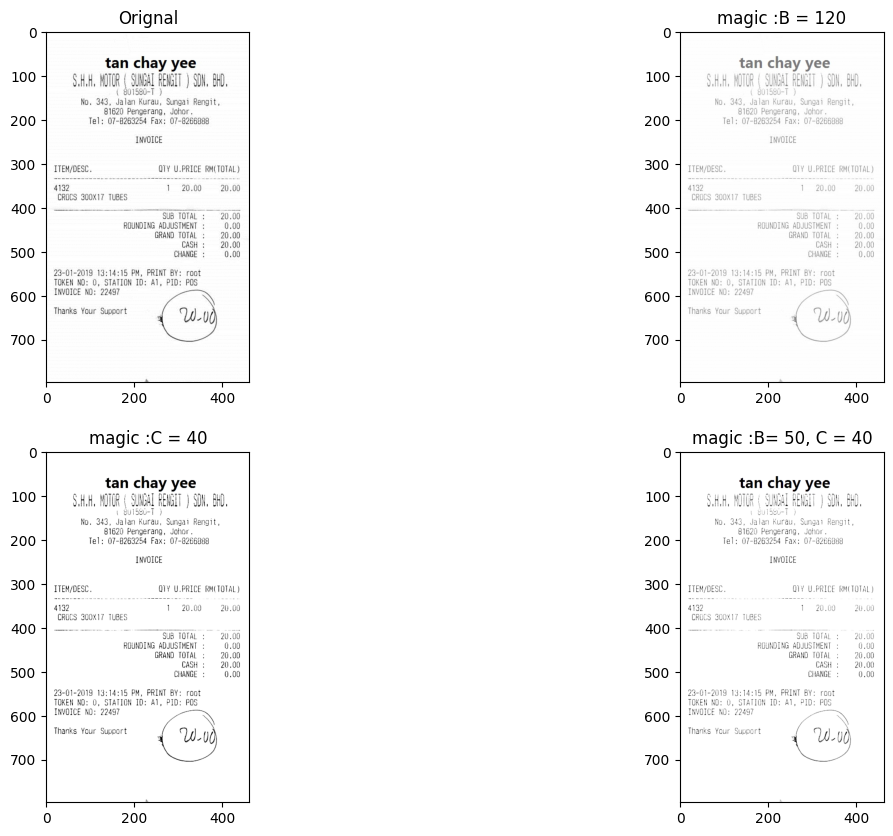

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(rgb)
plt.title('Orignal')

plt.subplot(2,2,2)
plt.imshow(magic_image)
plt.title('magic :B = 120')

plt.subplot(2,2,3)
plt.imshow(magic_image_c1)
plt.title('magic :C = 40')


plt.subplot(2,2,4)
plt.imshow(magic_image_c2)
plt.title('magic :B= 50, C = 40')

plt.show()

In [20]:
import cv2
import numpy as np

def apply_brightness_contrast(input_img, brightness=0, contrast=0):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

# Load your grayscale image (since you mentioned it's a black and white invoice image)
img = cv2.imread("./images/N008.jpg", cv2.IMREAD_GRAYSCALE)

# Apply brightness and contrast adjustments
magic_image = apply_brightness_contrast(img, 120, 0)
magic_image_c1 = apply_brightness_contrast(img, 0, 40)
magic_image_c2 = apply_brightness_contrast(img, 50, 40)


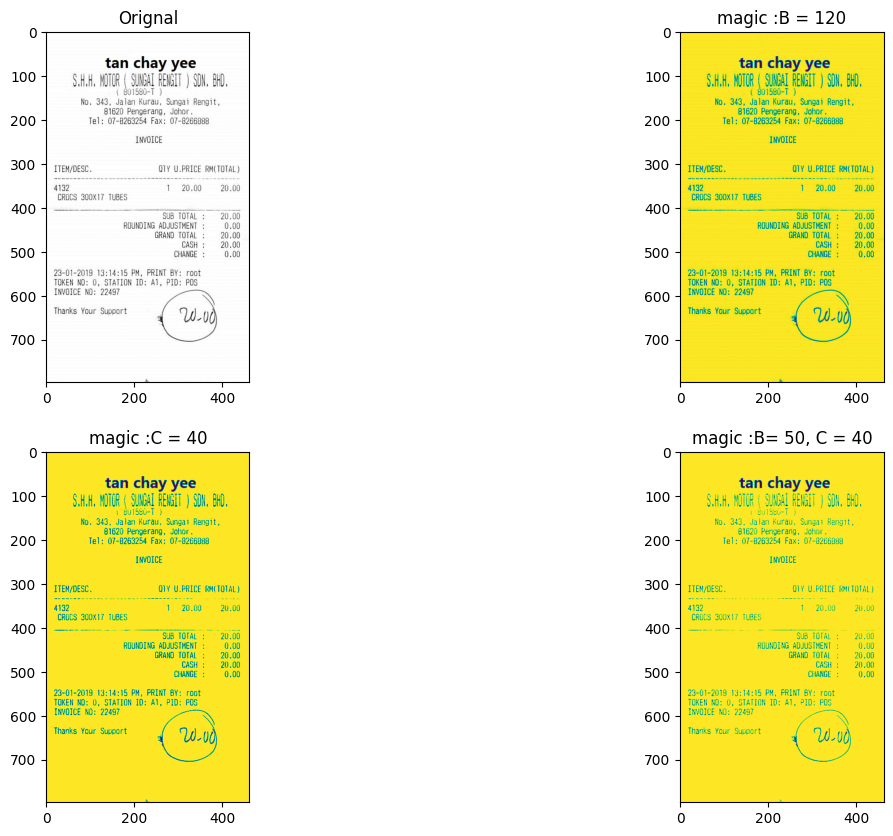

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(rgb)
plt.title('Orignal')

plt.subplot(2,2,2)
plt.imshow(magic_image)
plt.title('magic :B = 120')

plt.subplot(2,2,3)
plt.imshow(magic_image_c1)
plt.title('magic :C = 40')


plt.subplot(2,2,4)
plt.imshow(magic_image_c2)
plt.title('magic :B= 50, C = 40')

plt.show()

### Predictions

In [22]:
import predictions as pred

In [25]:
img_bb, results = pred.getPredictions(rgb)

tan chay yee Sufi. HOTOR SUNGAT RENGIT SON, Bt. 801580-T No. 343, Jalan Kurau, Sungai Rengit, 81620 Pengerang, Johor. el 07-8263254 Fax 07-8266888 INVOICE TTEM/DESC. QUY U.PRICE RNCTOTAL 4132 1 20.00 20. 00 CROCS 300X17 TUBES SUB TOTAL 20.00 ROUNDING ADJUSTMENT 0.00 GRAND TOTAL 20.00 CASH — 20.00 CHANGE 0.00 23-01-2019 131415 PM, PRINT BY root TOKEN NO 0, STATION ID Al, PID POS INVOICE NO 22497 Thanks Your Support 4 WwW 0


In [26]:
img_bb, results = pred.getPredictions(magic_image)

tan chay yee SiH, HOTOR SUNGAT RENGIT SON, Bt. 801580-T No. 343, Jalan Kurau, Sungai Rengit, 81620 Pengerang, Johor. el 07-8263254 Fax 07-8266888 INVOICE TTEM/DESC. QvY U.PRICE RNCTOTAL 4132 1 20.00 20. 00 CROCS 300X17 TUBES SUB TOTAL 20.00 ROUNDING ADJUSTMENT 0.00 GRAND TOTAL 20.00 CASH 20.00 CHANGE 0.00 23-01-2019 131415 PM, PRINT BY root TOKEN NO 0, STATION ID Al, PID POS INVOICE NO 22497 Thanks Your Support 4 WwW


In [29]:
img_bb1, results = pred.getPredictions(magic_image_c1)

tan chay yee SHH. MOTOR SUNGAT RENGET SON, BHD, sulosu-T No. 343, Jalan kurau, Sungai Rengit, 81620 Pengerang, Johor. Tel 07-8263254 Fax 07-8266888 INVOICE TTEM/DESC QUY U.PRICE RMTOTAL 4132 1 20.00 20.00 CROCS 300K17 TUBES SUB TOTAL 20.00 ROUNDING ADJUSTMENT 0.00 GRAND TOTAL 20.00 CASH 20.00 CHANGE 0.00 23-01-2019 131415 PM, PRINT BY root TOKEN NO 0, STATION 1D Al, PID POS INVOICE NO 22497 Thanks Your Support . WwW n


In [28]:
img_bb, results = pred.getPredictions(magic_image_c2)

tan chay yee SON, Bhd. Rengit, Pengerang, Johor Tel 07-8263254 Fax 07 INVOICE TTEM/DESC. GUY U.PRICE RMCTOTAL 4132 1 20.00 20.00 CROCS 300K17 TUBES SUB TOTAL 20.00 ROUNDING ADJUSTMENT 0.00 GRAND TOTAL 20.00 CASH 20.00 CHANGE 0,00 23-01-2019 151415 PM, PRINT BY root TOKEN NO U, STATION ID Al, PID POS INVOICE NO 22497 “— Thanks Your Support . W u


In [32]:
cv2.namedWindow('prediction',cv2.WINDOW_NORMAL)
cv2.imshow('prediction',img_bb1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
results

{'ORG': ['Tan', 'Chay', 'Yee'],
 'DATE': [],
 'MONEY': ['20.00', '20.00', '20.00', '20.00'],
 'CARDINAL': []}